## Load MNIST dataset

In [91]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


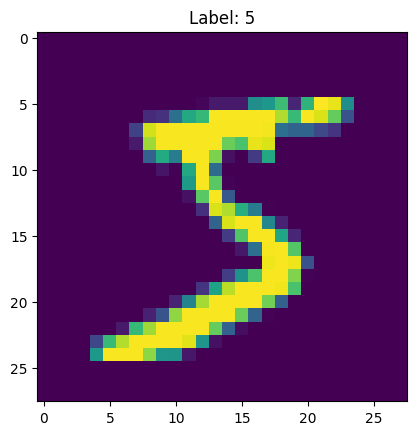

In [92]:
import matplotlib.pyplot as plt

image = train_images[0]
label = train_labels[0]
plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()

## ข้อ 1.

In [93]:
print(f"Shape of x_train: {train_images.shape}")
print(f"Shape of y_train: {train_labels.shape}")
print(f"Shape of x_test: {test_images.shape}")
print(f"Shape of y_test: {test_labels.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


## ข้อ 2.

In [94]:
print(f"Shape of x_train: {train_images.shape}")

Shape of x_train: (60000, 28, 28)


## ข้อ 3

In [95]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(train_labels)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## ข้อ 4.

Input:   28 × 28 grayscale image

Layer 1: Convolution (3 × 3 kernel, 30 filters, stride = 1, relu activation, use padding)

Layer 2: MaxPooling (2 × 2, stride = 2)

Layer 3: Convert feature maps into an input vector

Layer 4: Hidden Layer (64, relu)

Output: Dense (10, softmax)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [97]:
MiniCNN = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(30, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

MiniCNN.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 30)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,334 (1.44 MB)

 Trainable params: 377,334 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

## ข้อ 5.

optimizer =  'sgd'  , loss = 'categorical cross entropy' and learning rate = 0.005

In [98]:
from tensorflow.keras.optimizers import SGD

In [99]:
MiniCNN.compile(
    optimizer=SGD(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## ข้อ 6.

In [100]:
import matplotlib.pyplot as plt

hist = MiniCNN.fit(
    train_images, y,
    validation_split=0.1,
    epochs=50,
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8578 - loss: 1.2244 - val_accuracy: 0.9735 - val_loss: 0.0972
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9764 - loss: 0.0738 - val_accuracy: 0.9757 - val_loss: 0.0845
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9782 - val_loss: 0.0817
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9803 - val_loss: 0.0813
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9817 - val_loss: 0.0793
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9772 - val_loss: 0.0981
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9805 - val_loss: 0.0951
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9977 - loss:

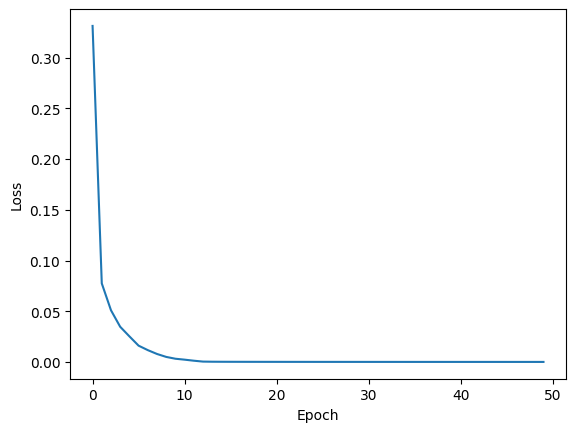

In [104]:
plt.plot(hist.history['loss'], label='Train Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## ข้อ 7.

In [105]:
y=to_categorical(test_labels)
acc=MiniCNN.evaluate(test_images,y)
print(acc[0], acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9808 - loss: 0.1237
0.10167968273162842 0.9846000075340271


## ข้อ 8.   

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [120]:
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {Y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [121]:
import numpy as np

In [ ]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## ข้อ 9.

## ข้อ 11.